In [25]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from libsvm import svmutil
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Akses Data

In [26]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target

/Users/fahmiyansyah/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


1. Ensure the number of data points for each digit label (0-9). Is there any data imbalance in the MNIST dataset being used? Explain your group's answer and provide evidence!

Number of sample data for digit 0: 6903
Number of sample data for digit 1: 7877
Number of sample data for digit 2: 6990
Number of sample data for digit 3: 7141
Number of sample data for digit 4: 6824
Number of sample data for digit 5: 6313
Number of sample data for digit 6: 6876
Number of sample data for digit 7: 7293
Number of sample data for digit 8: 6825
Number of sample data for digit 9: 6958


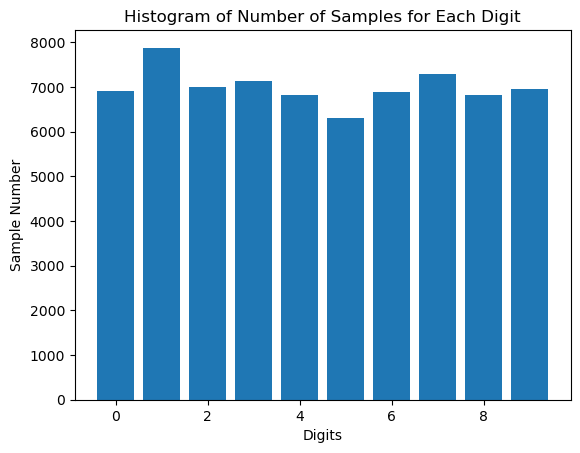

In [27]:
digit_counts = np.bincount(mnist.target.astype(int))

for digits, count in enumerate(digit_counts):
     print(f"Number of sample data for digit {digits}: {count}")
    
digits = list(range(10))

plt.bar(digits, digit_counts)
plt.xlabel('Digits')
plt.ylabel('Sample Number')
plt.title('Histogram of Number of Samples for Each Digit')
plt.show()

2. Display the first 15 images from the MNIST dataset along with their labels.

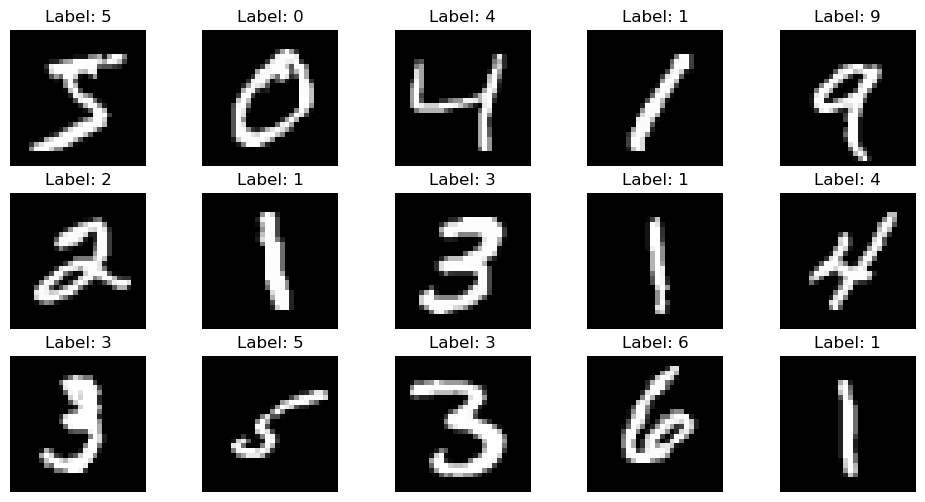

In [28]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

3. Perform feature extraction on the MNIST data. In this process

In [29]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Original Pixel Values

In [30]:
# Cek dimensi data
print("Dimensi X (fitur):", X.shape)
print("Dimensi y (label):", y.shape)

Dimensi X (fitur): (70000, 784)
Dimensi y (label): (70000,)


PCA

In [31]:
# Original pixel values as features
X_original = mnist.data.astype(float)

# Perform PCA for feature extraction
n_components = 50 
pca = PCA(n_components=n_components, random_state=42)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_original)

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_standardized)

In [32]:
X_pca = X_pca[:10000]
y = y[:10000]
X_original = X_original[:10000]

## 70:30

PCA

In [33]:
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 70:30")
print("Training data dimensions:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Testing data dimensions:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Ratio 70:30
Training data dimensions:
X_train: (7000, 50)
y_train: (7000,)
Testing data dimensions:
X_test: (3000, 50)
y_test: (3000,)


SVM Linier Classification (PCA)

In [34]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_pca = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_pca)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9156666666666666


SVM Linier Evaluate (PCA)

Training Set Results:
Accuracy: 0.9655714285714285
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       695
           1       0.98      0.99      0.98       790
           2       0.96      0.96      0.96       692
           3       0.93      0.96      0.94       732
           4       0.97      0.98      0.97       663
           5       0.96      0.95      0.96       611
           6       0.99      0.99      0.99       711
           7       0.96      0.96      0.96       740
           8       0.96      0.92      0.94       682
           9       0.95      0.93      0.94       684

    accuracy                           0.97      7000
   macro avg       0.97      0.96      0.97      7000
weighted avg       0.97      0.97      0.97      7000


Testing Set Results:
Accuracy: 0.9156666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99   

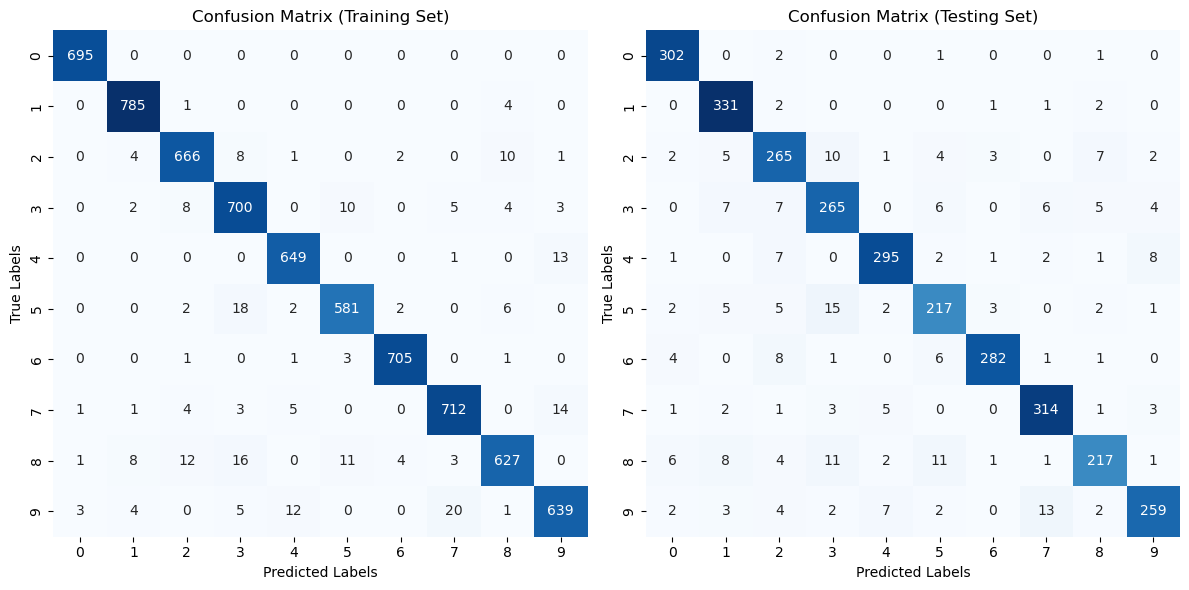

In [35]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_pred_pca)
test_report = classification_report(y_test, y_pred_pca)
test_confusion_matrix = confusion_matrix(y_test, y_pred_pca)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()

Original Pixel Value

In [36]:
# Split data into 70% training and 30% testing using original pixel values
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.3, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 70:30")
print("Training data dimensions (Original Pixel Values):")
print("X_train_original:", X_train_original.shape)
print("y_train:", y_train_original.shape)
print("Testing data dimensions (Original Pixel Values):")
print("X_test_original:", X_test_original.shape)
print("y_test:", y_test_original.shape)


Ratio 70:30
Training data dimensions (Original Pixel Values):
X_train_original: (7000, 784)
y_train: (7000,)
Testing data dimensions (Original Pixel Values):
X_test_original: (3000, 784)
y_test: (3000,)


SVM Linier Classification (Original)

In [37]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train_original, y_train_original)

# Make predictions on the testing data
y_pred_original = svm_classifier.predict(X_test_original)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test_original, y_pred_original)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9186666666666666


SVM Linier Evaluation (Original)

Training Set Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       790
           2       1.00      1.00      1.00       692
           3       1.00      1.00      1.00       732
           4       1.00      1.00      1.00       663
           5       1.00      1.00      1.00       611
           6       1.00      1.00      1.00       711
           7       1.00      1.00      1.00       740
           8       1.00      1.00      1.00       682
           9       1.00      1.00      1.00       684

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Testing Set Results:
Accuracy: 0.9186666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       3

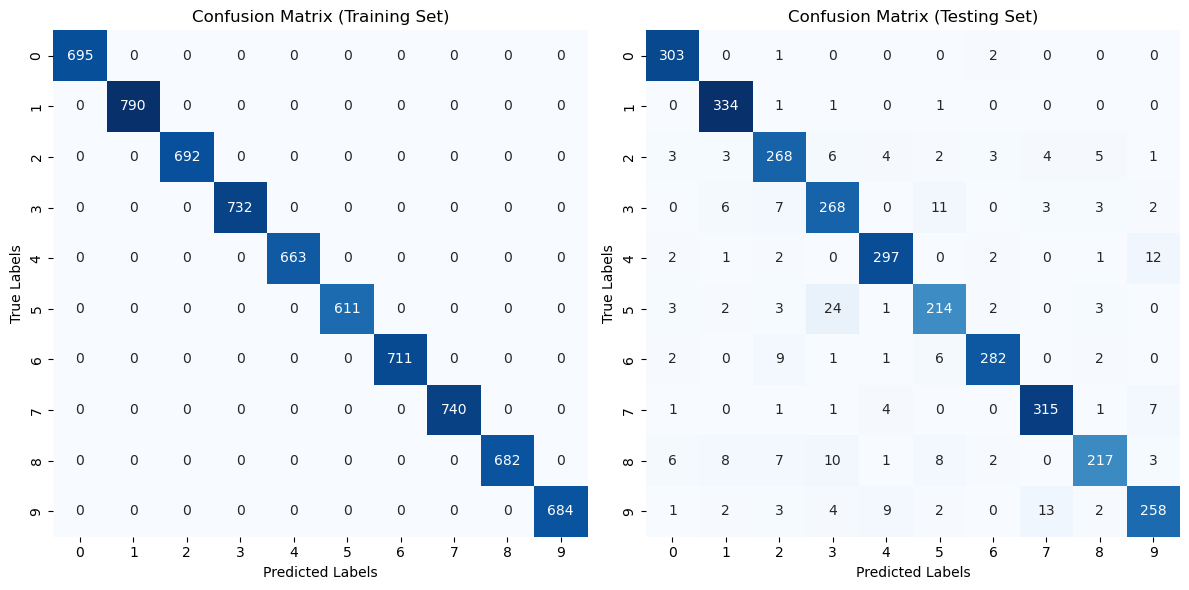

In [38]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train_original)
train_accuracy = accuracy_score(y_train_original, y_train_pred)
train_report = classification_report(y_train_original, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_original, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)
test_confusion_matrix = confusion_matrix(y_test_original, y_pred_original)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()


Display data with PCA x Original

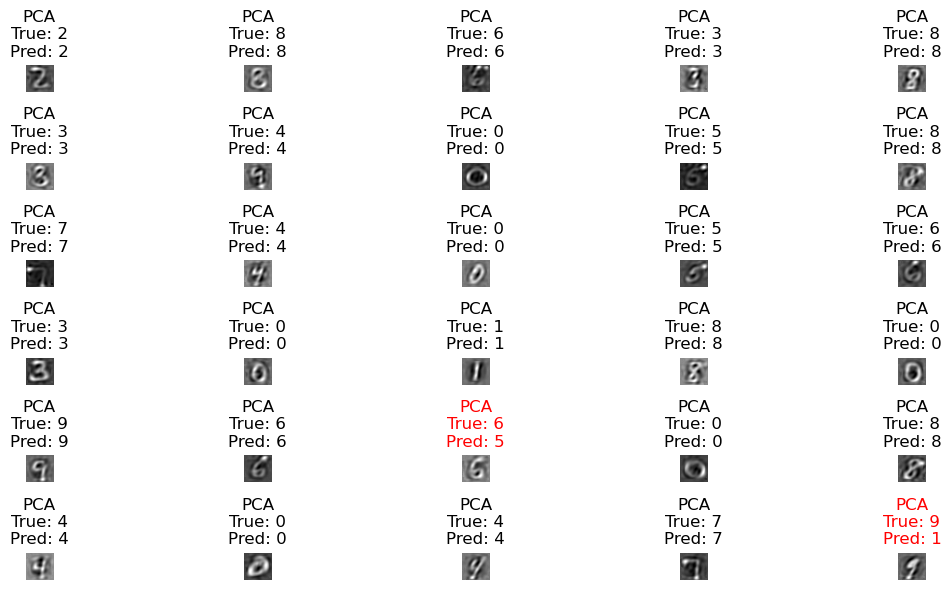

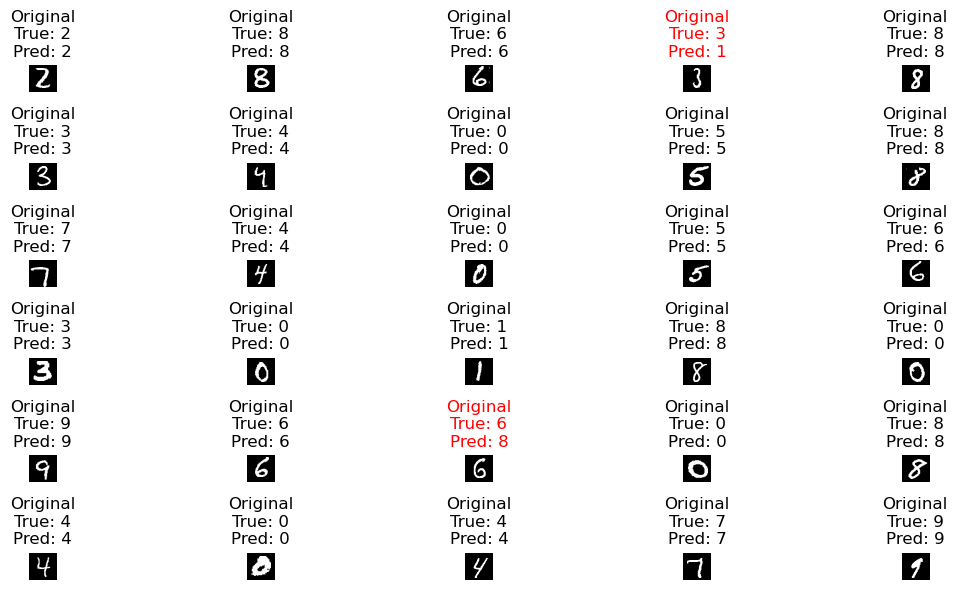

In [39]:
# Select multiple samples of test data to display
n_samples_to_display = 30

# Uses PCA components to return the image to its original form
X_restored = pca.inverse_transform(X_test)

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_pca

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"PCA\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Select multiple samples of test data to display
n_samples_to_display = 30

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test_original
predicted_labels = y_pred_original

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_original[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_labels
        # Determine text color based on correct or incorrect prediction
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # If prediction is correct, text is black
    else:
        text_color = 'red'  # If prediction is incorrect, text is red
    plt.title(f"Original\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()


## 80:20


PCA

In [40]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 80:20")
print("Training data dimensions:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Testing data dimensions:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Ratio 80:20
Training data dimensions:
X_train: (8000, 50)
y_train: (8000,)
Testing data dimensions:
X_test: (2000, 50)
y_test: (2000,)


SVM Linier Classification (PCA)

In [41]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_pca = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_pca)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9225


SVM Linier Evaluate (PCA)

Training Set Results:
Accuracy: 0.961
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       794
           1       0.97      0.99      0.98       911
           2       0.96      0.96      0.96       787
           3       0.93      0.95      0.94       840
           4       0.96      0.97      0.97       769
           5       0.95      0.93      0.94       687
           6       0.98      0.99      0.99       794
           7       0.96      0.96      0.96       854
           8       0.95      0.91      0.93       778
           9       0.95      0.93      0.94       786

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000


Testing Set Results:
Accuracy: 0.9225
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       207
       

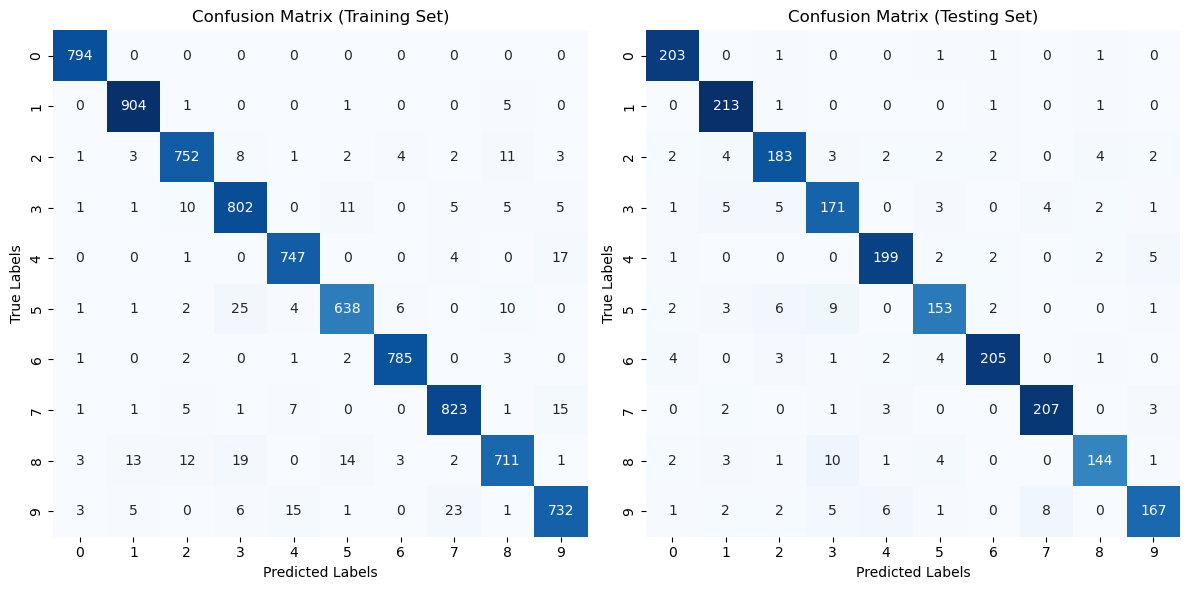

In [42]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_pred_pca)
test_report = classification_report(y_test, y_pred_pca)
test_confusion_matrix = confusion_matrix(y_test, y_pred_pca)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()

Original Pixel Value

In [43]:
# Split data into 80% training and 20% testing using original pixel values
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 80:20")
print("Training data dimensions (Original Pixel Values):")
print("X_train_original:", X_train_original.shape)
print("y_train:", y_train_original.shape)
print("Testing data dimensions (Original Pixel Values):")
print("X_test_original:", X_test_original.shape)
print("y_test:", y_test_original.shape)


Ratio 80:20
Training data dimensions (Original Pixel Values):
X_train_original: (8000, 784)
y_train: (8000,)
Testing data dimensions (Original Pixel Values):
X_test_original: (2000, 784)
y_test: (2000,)


SVM Linier Classification (Original)

In [44]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train_original, y_train_original)

# Make predictions on the testing data
y_pred_original = svm_classifier.predict(X_test_original)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test_original, y_pred_original)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9235


SVM Linier Evaluate (Original)

Training Set Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       911
           2       1.00      1.00      1.00       787
           3       1.00      1.00      1.00       840
           4       1.00      1.00      1.00       769
           5       1.00      1.00      1.00       687
           6       1.00      1.00      1.00       794
           7       1.00      1.00      1.00       854
           8       1.00      1.00      1.00       778
           9       1.00      1.00      1.00       786

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


Testing Set Results:
Accuracy: 0.9235
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       207
         

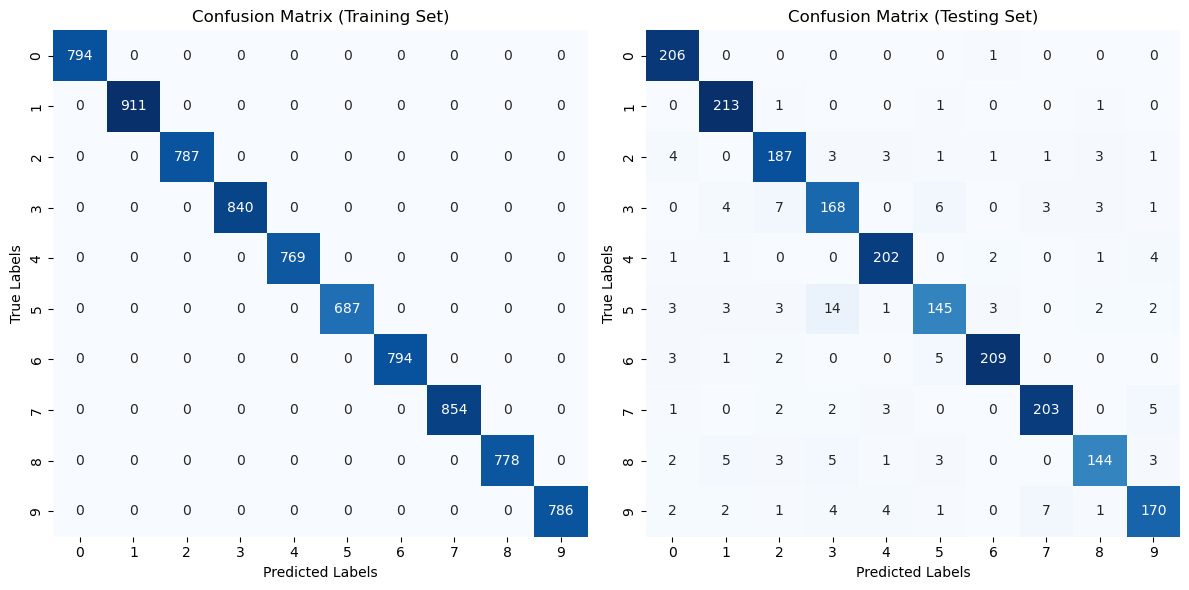

In [45]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train_original)
train_accuracy = accuracy_score(y_train_original, y_train_pred)
train_report = classification_report(y_train_original, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_original, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)
test_confusion_matrix = confusion_matrix(y_test_original, y_pred_original)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()


Display data PCA X Original

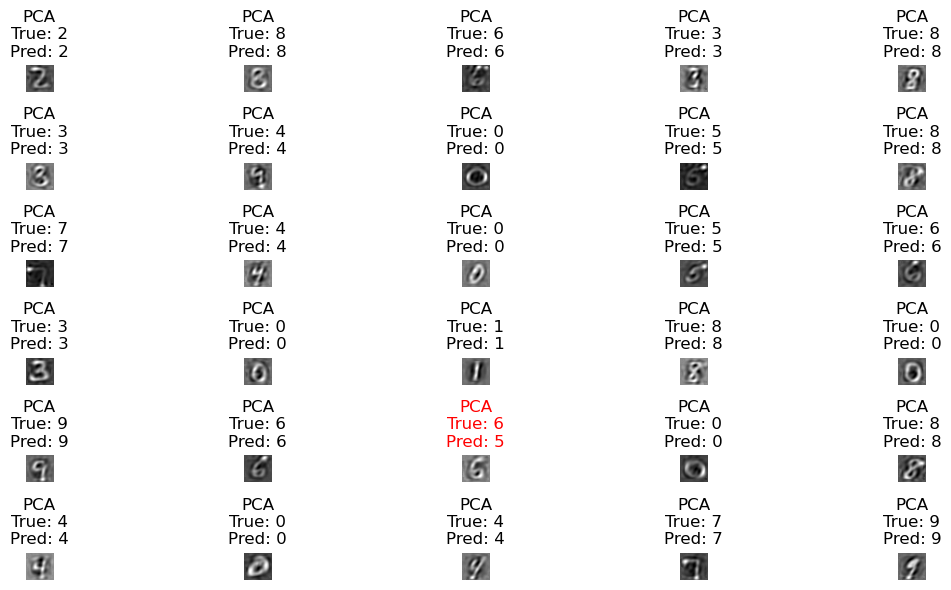

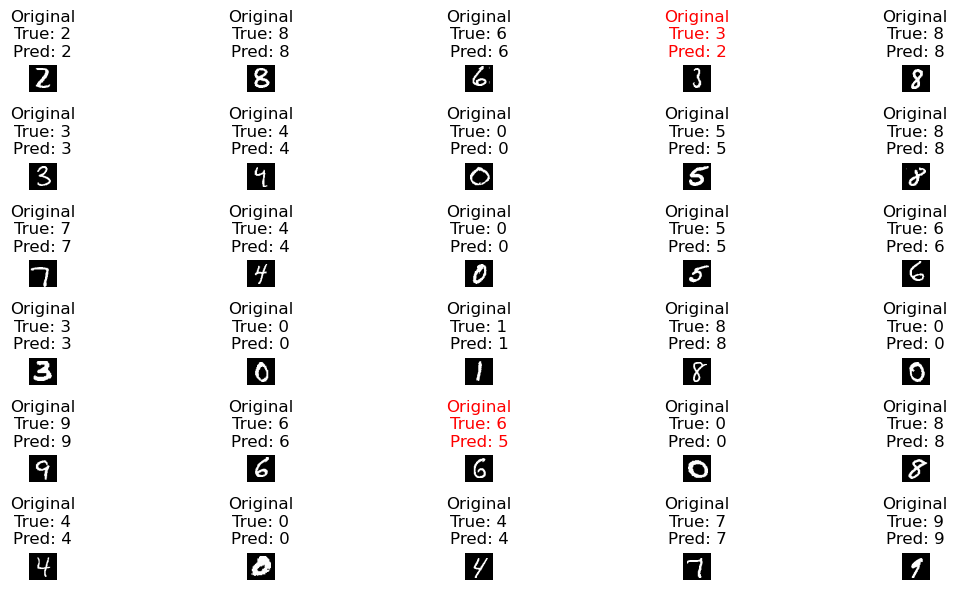

In [46]:
# Select multiple samples of test data to display
n_samples_to_display = 30

# Uses PCA components to return the image to its original form
X_restored = pca.inverse_transform(X_test)

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_pca

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"PCA\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Select multiple samples of test data to display
n_samples_to_display = 30

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test_original
predicted_labels = y_pred_original

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_original[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_labels
        # Determine text color based on correct or incorrect prediction
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # If prediction is correct, text is black
    else:
        text_color = 'red'  # If prediction is incorrect, text is red
    plt.title(f"Original\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()


## 90:10

PCA

In [47]:
# Split data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 90:10")
print("Training data dimensions:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Testing data dimensions:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Ratio 90:10
Training data dimensions:
X_train: (9000, 50)
y_train: (9000,)
Testing data dimensions:
X_test: (1000, 50)
y_test: (1000,)


SVM Linier Classification (PCA)

In [48]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_pca = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_pca)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.924


SVM Linier Evaluate (PCA)

Training Set Results:
Accuracy: 0.9596666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       897
           1       0.97      0.99      0.98      1019
           2       0.96      0.95      0.96       897
           3       0.93      0.94      0.94       932
           4       0.96      0.97      0.97       879
           5       0.95      0.93      0.94       768
           6       0.99      0.98      0.98       899
           7       0.96      0.96      0.96       967
           8       0.94      0.92      0.93       862
           9       0.95      0.93      0.94       880

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000


Testing Set Results:
Accuracy: 0.924
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      

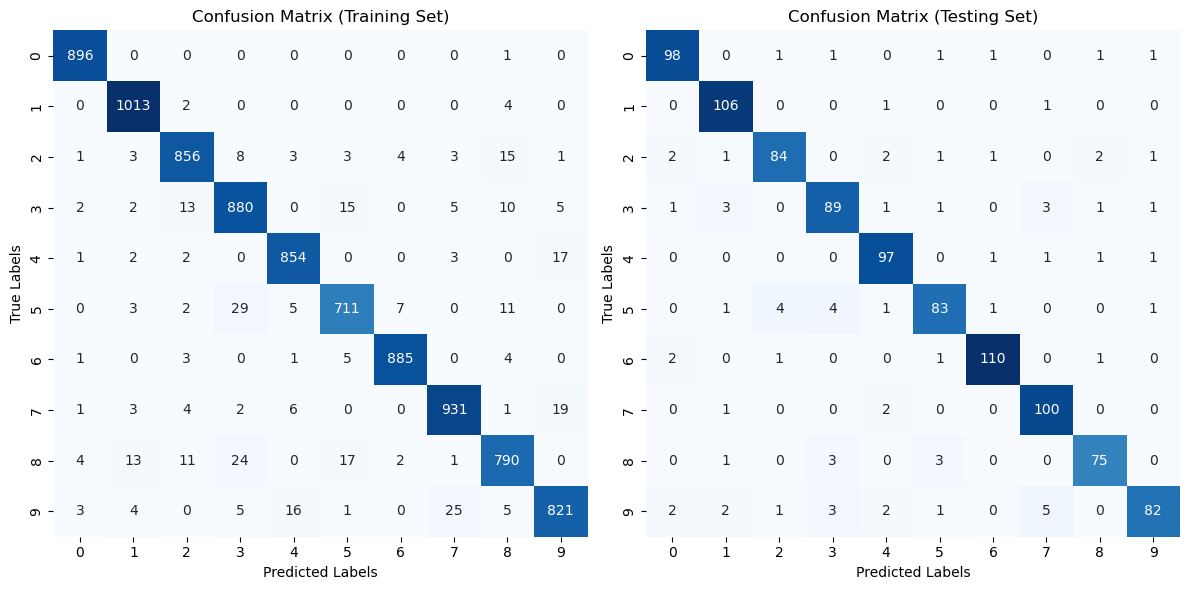

In [49]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_pred_pca)
test_report = classification_report(y_test, y_pred_pca)
test_confusion_matrix = confusion_matrix(y_test, y_pred_pca)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()

Original Pixel Value

In [50]:
# Split data into 90% training and 10% testing using original pixel values
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.1, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 90:10")
print("Training data dimensions (Original Pixel Values):")
print("X_train_original:", X_train_original.shape)
print("y_train:", y_train_original.shape)
print("Testing data dimensions (Original Pixel Values):")
print("X_test_original:", X_test_original.shape)
print("y_test:", y_test_original.shape)


Ratio 90:10
Training data dimensions (Original Pixel Values):
X_train_original: (9000, 784)
y_train: (9000,)
Testing data dimensions (Original Pixel Values):
X_test_original: (1000, 784)
y_test: (1000,)


SVM Linier Classification (Original)

In [51]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train_original, y_train_original)

# Make predictions on the testing data
y_pred_original = svm_classifier.predict(X_test_original)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test_original, y_pred_original)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.927


SVM Linier Evaluate (Original)

Training Set Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       1.00      1.00      1.00      1019
           2       1.00      1.00      1.00       897
           3       1.00      1.00      1.00       932
           4       1.00      1.00      1.00       879
           5       1.00      1.00      1.00       768
           6       1.00      1.00      1.00       899
           7       1.00      1.00      1.00       967
           8       1.00      1.00      1.00       862
           9       1.00      1.00      1.00       880

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000


Testing Set Results:
Accuracy: 0.927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       104
          

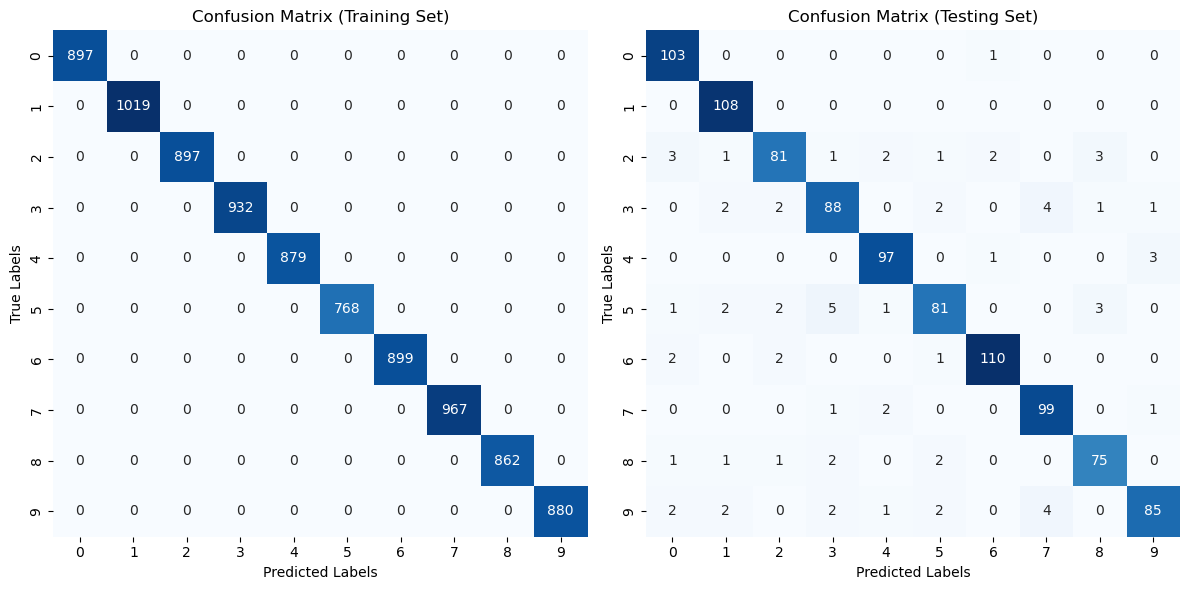

In [52]:
# Evaluate the model on the training data
y_train_pred = svm_classifier.predict(X_train_original)
train_accuracy = accuracy_score(y_train_original, y_train_pred)
train_report = classification_report(y_train_original, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_original, y_train_pred)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)
test_confusion_matrix = confusion_matrix(y_test_original, y_pred_original)

# Print the results for both training and testing
print("Training Set Results:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_report)

print("\nTesting Set Results:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the confusion matrix for the training set
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix (Training Set)")

# Visualize the confusion matrix for the testing set
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.show()


Display Data PCA x Original

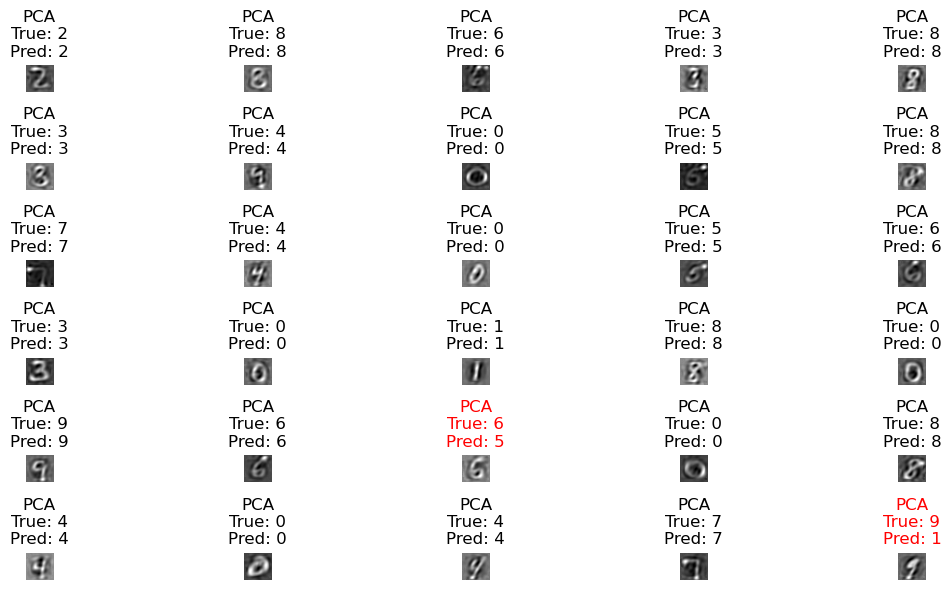

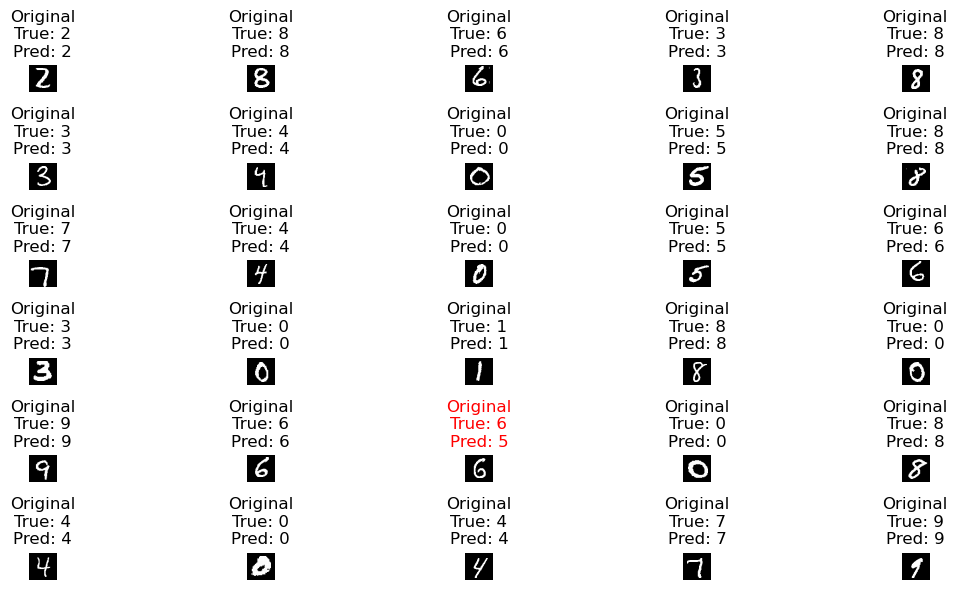

In [53]:
# Select multiple samples of test data to display
n_samples_to_display = 30

# Uses PCA components to return the image to its original form
X_restored = pca.inverse_transform(X_test)

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_pca

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"PCA\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Select multiple samples of test data to display
n_samples_to_display = 30

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test_original
predicted_labels = y_pred_original

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_original[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_labels
        # Determine text color based on correct or incorrect prediction
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # If prediction is correct, text is black
    else:
        text_color = 'red'  # If prediction is incorrect, text is red
    plt.title(f"Original\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()
